# LIQI Challenge for ABC Company

---------
Objective: 

Prepare a report for the lending manager to help him/her decide whether to approve the short-term (<12 months) funding request from ABC Company.

We are given the filed financial statement for 2021, and also transactions for the year of 2022. Based on 2 years of data I'll try to generate a report for the lending manager.
 
Key Metrics to extract to asses the ABC Company in 2022:

- Liquidity
- Solvency
- Profitability

A company's liquidity indicates its capacity to endure short-term difficulties, while solvency reveals its capability to meet long-term debt and obligations. Profitability, on the other hand, indicates the ability to generate cash flows and net income from inputs.



---------

In [6]:
# Import Libraries
# matplotlib - To show plots.
# GoogleTranslator - To translate the text financial statement we will analyze.
# pandas - to work with data frames.
# parse Xml file 

from deep_translator import GoogleTranslator
import matplotlib.pyplot as plt
import pandas as pd
import json
import xmltodict
import numpy as np

In [7]:
with open('data/financial_statements.xml', 'r') as file:
    financial_statements = file.read()

parsed_fs = xmltodict.parse(financial_statements)

with open('data/financial_statements.json', 'w') as file:
    json.dump(parsed_fs , file)
    
f = open('data/financial_statements.json')
  
# returns JSON object as a dictionary
financial_statements = json.load(f)

transactions = pd.read_csv('data/transactions.csv')

## Transactions Data Pre-processing

In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       115 non-null    object
 1   categoria  115 non-null    object
 2   amount     115 non-null    object
dtypes: object(3)
memory usage: 2.8+ KB


In [9]:
# Realize that 'data ' has a space break after the letter 'a'.
transactions.columns

Index(['data ', 'categoria', 'amount'], dtype='object')

In [10]:
# Check the transactions data examples.
transactions.head(10)

,data,categoria,amount
0,04/01/2022,INCASSO FATTURA,"€ 5.000,00"
1,13/01/2022,INCASSO FATTURA,"€ 4.800,00"
2,15/01/2022,STIPENDI,"-€ 6.000,00"
3,15/01/2022,RIMBORSO FINANZIAMENTO,"-€ 1.200,00"
4,22/01/2022,INCASSO FATTURA,"€ 5.400,00"
5,30/01/2022,UTENZE,"-€ 800,00"
6,31/01/2022,INCASSO FATTURA,"€ 5.466,67"
7,31/01/2022,PAGAMENTO FORNITORI,"-€ 4.000,67"
8,09/02/2022,INCASSO FATTURA,"€ 5.666,67"
9,09/02/2022,PAGAMENTO FORNITORI,"-€ 3.800,67"


---- 

 - We can observe that categoria has different types of transactions. 
 - To work with amount data, we need to convert it to float from string.

----


In [11]:
# Convert amount column into numeric.
transactions['amount'] = pd.to_numeric(transactions['amount'].str.replace('€','').str.replace(' ','').str.replace('.','').str.replace(',','.'))
transactions[str(transactions.columns[0])] = pd.to_datetime(transactions[str(transactions.columns[0])], format='%d/%m/%Y')

# Translate the 'Categoria' into english.
translator = GoogleTranslator()
transactions['categoria'] = transactions['categoria'].apply(lambda x: translator.translate(x))

/var/folders/zs/v8gw8g596vjbsqn51ryrf4b00000gn/T/ipykernel_41151/603711732.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  transactions['amount'] = pd.to_numeric(transactions['amount'].str.replace('€','').str.replace(' ','').str.replace('.','').str.replace(',','.'))


In [12]:
# Check the results
for index, row in transactions.iterrows():
    print(row["data "],row["categoria"], row["amount"])

2022-01-04 00:00:00 INVOICE COLLECTION 5000.0
2022-01-13 00:00:00 INVOICE COLLECTION 4800.0
2022-01-15 00:00:00 SALARIES -6000.0
2022-01-15 00:00:00 FINANCING REFUND -1200.0
2022-01-22 00:00:00 INVOICE COLLECTION 5400.0
2022-01-30 00:00:00 UTILITIES -800.0
2022-01-31 00:00:00 INVOICE COLLECTION 5466.67
2022-01-31 00:00:00 SUPPLIER PAYMENT -4000.67
2022-02-09 00:00:00 INVOICE COLLECTION 5666.67
2022-02-09 00:00:00 SUPPLIER PAYMENT -3800.67
2022-02-15 00:00:00 SALARIES -6000.0
2022-02-15 00:00:00 FINANCING REFUND -1200.0
2022-02-18 00:00:00 INVOICE COLLECTION 5866.67
2022-02-18 00:00:00 SUPPLIER PAYMENT -4300.67
2022-02-27 00:00:00 INVOICE COLLECTION 6066.67
2022-02-27 00:00:00 SUPPLIER PAYMENT -4334.0
2022-02-28 00:00:00 UTILITIES -804.49
2022-03-08 00:00:00 INVOICE COLLECTION 6266.67
2022-03-08 00:00:00 SUPPLIER PAYMENT -4484.0
2022-03-15 00:00:00 SALARIES -6000.0
2022-03-15 00:00:00 FINANCING REFUND -1200.0
2022-03-17 00:00:00 INVOICE COLLECTION 6466.67
2022-03-17 00:00:00 SUPPLIER PA

In [13]:
# Checking categories and each of their's sum. 
# Just a quick math operation.
transactions.groupby('categoria')['amount'].sum()

categoria
FINANCING REFUND        -17900.00
FUNDING DISTRIBUTION     10000.00
INVOICE COLLECTION      363533.46
INVOICE PAYMENT         -40000.00
SALARIES                -46000.00
SUPPLIER PAYMENT       -253042.01
UTILITIES                -9066.31
Name: amount, dtype: float64

# 2021 Financial Statement  Data Pre-Processing

In [14]:
results = []
for i in financial_statements["html"]["body"]["xbrl"]:
    translation =GoogleTranslator(source='it', target='en').translate(i)
    test = financial_statements["html"]["body"]["xbrl"][str(i)]
    if type(test) == dict:
        if '@contextref' in test and '#text' in test:
            contextref = test['@contextref']
            text = test['#text']
            results.append([contextref, translation, text])
    elif type(test) == list:
        for j in test:
            if '@contextref' in j and '#text' in j:
                contextref = j['@contextref']
                text = j['#text']
                results.append([contextref, translation, text])

df = pd.DataFrame(results, columns=['contextref', 'translation', 'text'])

In [15]:
df

,contextref,translation,text
0,i_Corrente,"itcc-ci: equity, profit, loss for the year",-94264
1,d_Corrente,itcc-ci: profit/loss year,-94264
2,d_Corrente,itcc-ci: differencevaluecostproduction,-94264
3,d_Corrente,itcc-ci: result before taxes,-94264
4,i_Corrente,itcc-ci:totalecreditiversosociversamentiancora...,33
...,...,...,...
81,d_Corrente,itcc-ci:alienazioniesercizionumeroazioniquotes...,0
82,d_Corrente,itcc-ci:alienazionieserciziopartecapitalecorri...,0
83,d_Corrente,itcc-ci:alienazionieserciziopartecapitalecorri...,0
84,d_Corrente,itcc-ci:alienazionieserciziovalorenominaleazio...,0


----

<p>Some metrics we can use to help our lending manager:<p>

<ol>
<li><b>Patrimonio netto/the total value of a company's assets minus its liabilities (metric #5)</b></li>
<li><b>Total liquid assets (metric #16)</b></li>
<li><b>Total equity (metric #20)</b></li>
<li><b>Total debts (metric #27)</b></li>
<li><b>Debts due within the following year (metric #28)</b></li>
<li><b>Total assets in circulation (metric #29)</b></li>
<li><b>Profit/loss for the year or the result before taxes (metric #0 and #3)</b></li>
<li><b>Total production value (metric #24)</b></li>
<li><b> The value of production, revenues, sales, services (metric #23)</b></li>
</ol>

They can be used by lending manager and by us to evaluate a company's financial health and its ability to repay the loan. We can use them to asses the company's liquidity, profitability, and solvency.

- <b>Shareholders equity profit loss year </b>: <b>€-94,264</b> which is the net income or loss of the company, which is an indicator of the company's profitability.

- <b>Patrimonio netto / the total value of a company's assets minus its liabilities</b> : <b>€209</b>, which is an indicator of the company's net worth and can be used to measure the company's solvency.

- <b>Total equity</b>: <b> €85,927 </b>, An indicator of the company's net assets and we can use it to measure the company's solvency. It is also company's net worth and the value that would be left for shareholders if the company were liquidated.

- <b>Total liquid assets </b>:<b>€54,891</b>, which is an indicator of the company's liquidity, and can be used to measure the company's ability to meet short-term obligations.

- <b>Total assets in circulation</b>: <b>€145,786</b>, is a measure of the company's assets that are readily available to pay off its liabilities, which can be used to measure the company's liquidity.

- <b>Total liabilities</b>: <b>€225,168</b>, this metric is important in determining the company's solvency, by comparing the company's assets to its liabilities. ()

- <b>Debts due within the following year </b>: <b>€139,241</b>, the amount of debt that a company is obligated to repay within the next 12 months.<b>(2022)</b>

----



### Manual Translation of FS for remaining ones

In [16]:
df.at[0, 'translation'] = 'itcc-ci: shareholders equity profit loss year'
df.at[1, 'translation'] = 'itcc-ci: profit loss exercise'
df.at[2, 'translation'] = 'itcc-ci: production cost difference'
df.at[3, 'translation'] = 'itcc-ci: result before taxes'
df.at[4, 'translation'] = 'itcc-ci: total receivables from shareholders payments still due'
df.at[5, 'translation'] = 'itcc-ci: Patrimonio netto / the total value of a companys assets minus its liabilities'
df.at[11, 'trans}lation'] = 'itcc-ci: production value changes in inventories products processing progress semi-finished products'
df.at[12, 'translation'] = 'itcc-ci: production value changes in inventories products in progress semi-finished finished work in progress orders'
df.at[13, 'translation'] = 'itcc-ci: value of production other revenue income grants operating account'
df.at[14, 'translation'] = 'itcc-ci: production value other revenues income total other revenues income'
df.at[15, 'translation'] = 'itcc-ci: shareholders equity other reserves indicated separately total other reserves'
df.at[18, 'translation'] = 'itcc-ci: production costs ancillary raw materials goods consumption'
df.at[28, 'translation'] = 'itcc-ci: debts due within the following year'
df.at[31, 'translation'] = 'itcc-ci: total active'
df.at[38, 'translation'] = 'itcc-ci: personal details fully paid-up share capital'
df.at[40, 'translation'] = 'itcc-ci: master data company subordinated by others coordination management activity'
df.at[46, 'translation'] = 'itcc-ci: personal data on the main atheist sector of activity'
df.at[50, 'translation'] = 'itcc-ci: directors commitments assumed on their behalf effects guarantees given'
df.at[51, 'translation'] = 'itcc-ci: mayoral ties advances'
df.at[54, 'translation'] = 'itcc-ci: statutory auditors commitments assumed on their behalf effects guarantees given'
df.at[60, 'translation'] = 'itcc-ci: commitments towards parent companies subject to control'
df.at[68, 'translation'] = 'itcc-ci: shares quotes or parent companies corresponding capital share'
df.at[69, 'translation'] = 'itcc-ci: shares quotas parent companies nominal value'
df.at[70, 'translation'] = 'itcc-ci: acquisition of treasury shares'
df.at[71, 'translation'] = 'itcc-ci: acquisitions exercise consideration shares stakes in parent companies'
df.at[73, 'translation'] = 'itcc-ci: acquisitions during the year number of shares holdings of parent companies'
df.at[74, 'translation'] = 'itcc-ci: acquisitions of the corresponding share capital treasury shares'
df.at[75, 'translation'] = 'itcc-ci: acquisitions during the year of the corresponding share capital shares of parent companies'
df.at[76, 'translation'] = 'itcc-ci: acquisitions exercise nominal value treasury shares'
df.at[77, 'translation'] = 'itcc-ci: acquisitions exercise nominal value shares stakes in parent companies'
df.at[78, 'translation'] = 'itcc-ci: sale exercise consideration for treasury shares'
df.at[79, 'translation'] = 'itcc-ci: disposals for the consideration of shares shares in parent companies'
df.at[81, 'translation'] = 'itcc-ci: disposals exercise number of shares holdings of parent companies'
df.at[82, 'translation'] = 'itcc-ci: disposals of the capital corresponding to treasury shares'
df.at[83, 'translation'] = 'itcc-ci: disposals for the year of the corresponding capital shares shares in parent companies'
df.at[84, 'translation'] = 'itcc-ci: sale exercise nominal value treasury shares'
df.at[85, 'translation'] = 'itcc-ci: disposals exercise nominal value shares quotas parent companies'
df = df.rename(columns={'translation':'metric','text':'value'})


In [17]:
# Delete the rows that doesn't seem to provide much information for our analysis, and print the remanining ones.
df = df.drop(df.index[33:])
for index, row in df.iterrows():
    print(index,row['contextref'],row["metric"], row["value"])

0 i_Corrente itcc-ci: shareholders equity profit loss year -94264
1 d_Corrente itcc-ci: profit loss exercise -94264
2 d_Corrente itcc-ci: production cost difference -94264
3 d_Corrente itcc-ci: result before taxes -94264
4 i_Corrente itcc-ci: total receivables from shareholders payments still due 33
5 i_Corrente itcc-ci: Patrimonio netto / the total value of a companys assets minus its liabilities 209
6 d_Corrente itcc-ci: value production other revenue income other 260
7 d_Corrente itcc-ci: production costs various management costs 939
8 i_Corrente itcc-ci: active installments and prepayments 1765
9 i_Corrente itcc-ci: total tangible fixed assets 2765
10 i_Corrente itcc-ci: total inventories 3000
11 d_Corrente itcc-ci:valoreproduzionevariazionirimanenzeprodotticorsolavorazionesemilavoratifiniti 3000
12 d_Corrente itcc-ci: production value changes in inventories products in progress semi-finished finished work in progress orders 3000
13 d_Corrente itcc-ci: value of production other rev

In [18]:
# Seperate the df into period and instant
period = df[df['contextref'] == 'd_Corrente']
instant = df[df['contextref'] == 'i_Corrente']

print("PERIOD 12 January to 31 December 2021")
print("----------------------------------------")
for index, row in period.iterrows():
    print(index, row["metric"], row["value"]) 
print("----------------------------------------")
print("Instant  31 December 2021 ")
print("----------------------------------------")
for index, row in instant.iterrows():
    print(index, row["metric"], row["value"])
print("----------------------------------------")

PERIOD 12 January to 31 December 2021
----------------------------------------
1 itcc-ci: profit loss exercise -94264
2 itcc-ci: production cost difference -94264
3 itcc-ci: result before taxes -94264
6 itcc-ci: value production other revenue income other 260
7 itcc-ci: production costs various management costs 939
11 itcc-ci:valoreproduzionevariazionirimanenzeprodotticorsolavorazionesemilavoratifiniti 3000
12 itcc-ci: production value changes in inventories products in progress semi-finished finished work in progress orders 3000
13 itcc-ci: value of production other revenue income grants operating account 4000
14 itcc-ci: production value other revenues income total other revenues income 4260
18 itcc-ci: production costs ancillary raw materials goods consumption 75461
23 itcc-ci: value of production revenues sales services 111055
24 itcc-ci: total production value 118315
26 itcc-ci: cost of production and services 136179
30 itcc-ci: total production costs 212579
----------------------

---------

From the given metrics going into 2022, we can calculate the following metrics:

<ul>
  <li><b>Solvency Metrics</b></li>
  <ul>
    <li>Debt to Asset Ratio = Total Debt(#27) / Total Assets (#31)</li>
    <li>Debt to Equity ratio = Total Liabilities(#32) or (#27) / Total Equity(#20)</li> 
  </ul>
  <li><b>Liquidity Metrics</b></li>
  <ul>
    <li>Current Ratio = (total liquid assets (#16) + total inventories(#10) + total receivables (#22) + total receivables from shareholders(#4) + active installments and prepayments(#8)) / current liabilities (#28)</li>
    <li>Quick ratio = ( total liquid assets (#16) + total receivables (#22) + Installments and prepayments(#8) + total inventories(#10)) / Current Liabilities(#28)</li>
  </ul>
  <li><b>Profitability Metrics</b></li>
  <ul>
    <li>Return on Equity = net profit (#0) / total equity (#20) </li>
    <li>Fixed Asset Turnover Ratio = Net Sales (#23 )/ total fixed assets (#19)</li>
  </ul>
  <li><b>Leverage Metrics</b></li>
  <ul>
    <li>Debt Service Coverage Ratio (DSCR) = Net Operating Income (#23)/ Total Debt Servicing (#27)</li>
    <li>Capital Gearing Ratio = Common Stockholder Equity(#15) / Total liabilities</li>
  </ul>
</ul>

---------

In [74]:
"""
-------------------------------------------------------------------------------------
# Solvency Metrics
# Debt to Asset Ratio = Total Debt(#27) / Total Assets (#29) + (#19)
# Debt to equity ratio = Total Debt(#27) / Total Equity(#20)
-------------------------------------------------------------------------------------
"""
debt_to_asset = float(df['value'][27]) / (float(df['value'][31]))
debt_to_equity_short = float(df['value'][27]) /  float(df['value'][20])
debt_to_equity_long = float(df['value'][32]) /  float(df['value'][20])

"""
-------------------------------------------------------------------------------------
# Liquidity Metrics    
# Current Ratio:
#    "total liquid assets" (54891) (#16)
#    "total inventories" (3000)    (#10)
#    "total receivables from shareholders payments still due" 33 (#4)
#    "active installments and prepayments" 1765 (#8)
#    "receivables due within the following year" 87895 (#22)
#    "the current liabilities" would be "debts due within the following year" (139241)
# Quick Ratio: total liquid assets" (54891) + "total inventories" (3000) / debts due within the following year 139241
-------------------------------------------------------------------------------------
"""
current_ratio = (float(df['value'][16]) + float(df['value'][10])+float(df['value'][4])+ float(df['value'][8])+float(df['value'][22])) / float(df['value'][28])
quick_ratio = (float(df['value'][16]) + float(df['value'][10])) / float(df['value'][28])                                        
""" 
-------------------------------------------------------------------------------------
# Profitability Metrics
# ROE: shareholders equity profit loss year -94264 / total equity 85927
# FATR: A higher turnover ratio is indicative of greater efficiency in managing fixed-asset investments, 
but there is not an exact number or range that dictates whether a company has been efficient at generating 
revenue from such investments. For this reason, it is important for analysts and investors to compare a 
company’s most recent ratio to both its own historical ratios and ratio values from peer companies and/or 
average ratios for the company's industry as a whole.
        value of production revenues sales services 111055 / total assets in circulation 145786
-------------------------------------------------------------------------------------
"""

return_on_equity = (float(df['value'][0])) / float(df['value'][20])
fixed_asset_turnover_ratio  = float(df['value'][23]) / float(df['value'][19])

"""
-------------------------------------------------------------------------------------
# Leverage Metrics
# Debt Service Coverage Ratio (DSCR) = Measurement of a firm's available cash flow to pay current debt obligations.
# capital gearing ratio  = the amount of debt a company has relative to its equity.
-------------------------------------------------------------------------------------
"""
dscr = float(df['value'][23]) / float(df['value'][27])
capital_gearing_ratio = float(df['value'][23]) / float(df['value'][32])

In [75]:
print("----------------------------------------------")
print("2021 - Solvency Metrics")
print('Debt to Asset Ratio:', debt_to_asset)
print("Debt to Equity Ratio(Short): ",debt_to_equity_short)
print("Debt to Equity Ratio (Long):",debt_to_equity_long)
print("----------------------------------------------")
print("2021 - Profitability Metrics")
print("Return on Equity:",return_on_equity)
print("Fixed Asset Turnover Ratio:",fixed_asset_turnover_ratio)
print("----------------------------------------------")
print("2021 - Liquidity Metrics")
print("Current Ratio:", current_ratio)
print("Quick Ratio:", quick_ratio)
print("----------------------------------------------")
print("2021 - Leverage Metrics")
print("Debt Service Coverage Ratio (DSCR) ", dscr)
print("Capital Gearing Ratio: ",capital_gearing_ratio )

----------------------------------------------
2021 - Solvency Metrics
Debt to Asset Ratio: 0.006183871598095644
Debt to Equity Ratio(Short):  1.6204568994611706
Debt to Equity Ratio (Long): 2.6204568994611703
----------------------------------------------
2021 - Profitability Metrics
Return on Equity: -1.0970242182317549
Fixed Asset Turnover Ratio: 1.4314162713961642
----------------------------------------------
2021 - Liquidity Metrics
Current Ratio: 1.0599176966554391
Quick Ratio: 0.41576116230133364
----------------------------------------------
2021 - Leverage Metrics
Debt Service Coverage Ratio (DSCR)  0.7975739904194885
Capital Gearing Ratio:  0.4932095146734882


---------

<h4>Summary of 2021: </h4>


-  Total Production cost is <b>€212,579</b> (#30), and the money that made from these products is <b>€ 118,315</b> (#24) which cause the company to be in net profit of <b> € -94,264</b> (#0).<br>

- Going into 2022 company had total liability of <b>€225,168</b> (#32), where only <b>€139,241</b> (#28) of it to be paid in 2022.

- Company has a worth of <b>€22,516,800</b> (Totale Attivo #31) resources and assets that can be used to meet its debts and obligations.

---------

<h5>Solvency Metrics:</h5>

- Debt to Asset Ratio of 0.00618 shows that a very small portion of the company's assets are financed by debt.
- Debt to Equity Ratio of 1.62 shows that the company has a higher debt burden compared to its equity, indicating an elevated level of financial leverage.

<h5>Profitability Metrics:</h5>

- Return on Equity of -1.10 suggests that the company has not generated a profit for its shareholders.
- Fixed Asset Turnover Ratio of 1.43 shows that for every dollar of fixed assets,  company generated 1.43 euros in revenue. 

<h5>Liquidity Metrics:</h5>

- Current Ratio of 1.06 shows that the company has sufficient current assets to cover its short-term obligations.
- Quick Ratio of 0.42 indicates that the company may face difficulties in meeting its immediate cash obligations in the event of a crisis.

<h5>Leverage Metrics:</h5>

- Debt Service Coverage Ratio (DSCR) of 0.80 tells us that company has only 80 cents of cash flow for every dollar of debt service. This low can be interepreted that the company may have difficulty meeting its debt obligations and may be at risk of default. Though there is no industry standard, a DSCR of at least 2 is considered very strong. Many lenders will set minimum DSCR requirements between 1.2 and 1.25. <br><br>

- Capital Gearing Ratio of 0.49 suggests that the company is using a moderate amount of debt financing relative to its equity.

---------

# 2022 Transactions

---------
<p> We have analyzed the filed financial statement for 2021, now we will dive into the transactions of 2022 and try to extract information presented below:
 <ul>
    <li><b>Cash flows: </b> Total amount of cash inflows (such as Invoice Collection) and outflows (such as Salaries and Supplier Payment) for each month. This will give us an idea of the company's overall cash position for each month.
    </li>
<li><b> Trends in cash flows:</b> We will try to observe any trends in the cash inflows and outflows. For example, do the cash inflows tend to increase or decrease over time? Do the cash outflows tend to increase or decrease over time?
    </li>
<li><b> Changes in expenses:</b> We will look for changes in expenses, such as Salaries and Utilities, to see if they have increased or decreased over time. This will give us an insight into the company's cost structure.</li>
<li><b>Changes in revenue:</b> We can check the changes in revenue, such as Invoice Collection, to see if there are any significant changes over time.</li>
<li><b>Changes in funding:</b> We can check any changes in financing, such as Financing Refund and Funding Distribution, to see if there are any significant changes over time.</li>
<li><b>Changes in payables:</b> We will look at the changes in payables, such as Supplier Payment, to see if there are any changes over time.</li>
<li><b>Changes in receivables:</b> We will look at any changes in the accounts receivable, such as Invoice Collection  to see if there are any changes over time.</li>
<li><b>Changes in profitability:</b> We will look for any changes in profitability.</li>
</ul>

-------------

<AxesSubplot: xlabel='month'>

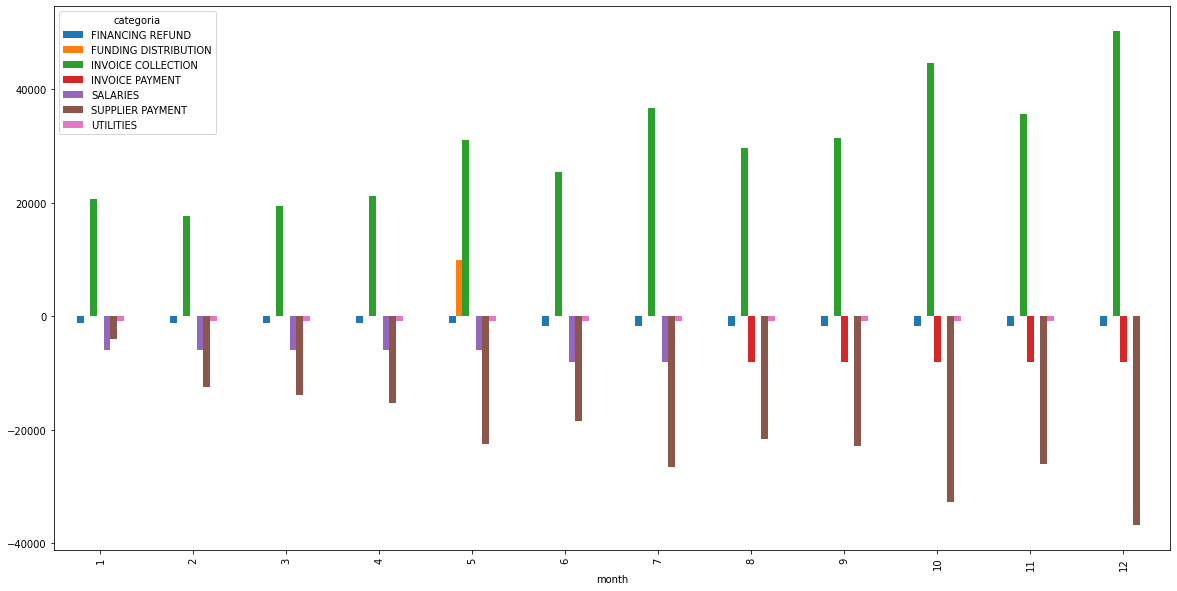

In [19]:
transactions["data "] = pd.to_datetime(transactions["data "])
transactions['month'] = transactions["data "].dt.month
monthly_totals = transactions.groupby(['month', 'categoria'])['amount'].sum()
monthly_totals.unstack().plot(kind='bar', figsize=(20, 10))

---------
- The financing refund payment changes after some months. In the first few months, the financing refund is 1200 but it changes to 1700 in the June(06)
 
- The company seems to stop paying salaries after July. 

- The invoice collection also varies month to month, with some months having higher collection than others.

- The supplier payments also varies month to month, with some months having higher payments than others.

- The utilities expenses also varies month to month, with some months having higher expenses than others.

- It is also possible that the company had engaged in invoice factoring based on the presence of "Invoice Collection" and "Invoice Payment" transactions in the list. 

---------

### Changes in Cashflow

In [20]:
monthly_totals_test = monthly_totals.reset_index()
monthly_totals_test['categoria'] = monthly_totals_test['categoria'].astype(str)
monthly_cash_flow = monthly_totals_test.groupby('month')['amount'].sum()

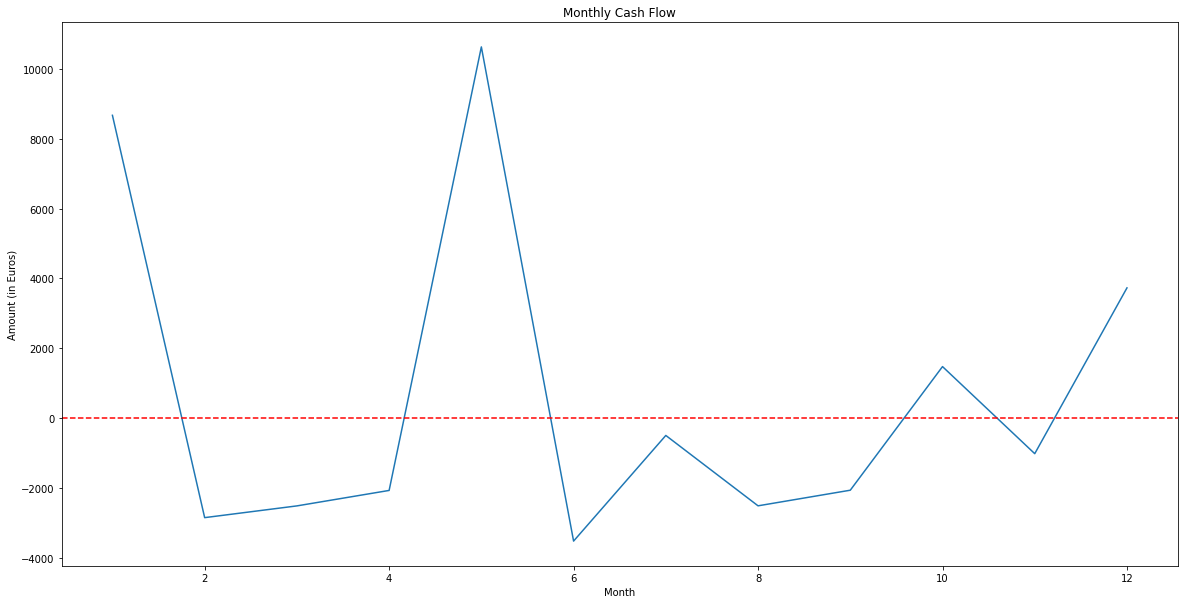

In [21]:
plt.figure(figsize=(20,10))
plt.plot(monthly_cash_flow)
plt.axhline(0, color='red', linestyle='--')
plt.title("Monthly Cash Flow")
plt.xlabel("Month")
plt.ylabel("Amount (in Euros)")
plt.show()

In [22]:
monthly_totals_test['categoria'] = monthly_totals_test['categoria'].astype(str)
monthly_cash_flow = monthly_totals_test.groupby('month')['amount'].sum()

-----

- We can observe that there is a sudden decrease in the net cashflow in the 2nd and 6th months. Moreover, we see company is in net negative for 8 months out of 12.
- There is an steady increase trend in net cashflow after the month of 6.

-----


### Changes in expenses

In [23]:
expenses = monthly_totals_test[monthly_totals_test['categoria'].isin(['SALARIES', 'UTILITIES','FINANCING REFUND','INVOICE PAYMENT','SUPPLIER PAYMENT'])].groupby('month')['amount'].sum()
expenses = expenses.reset_index()
expenses.rename(columns={'amount': 'expenses'}, inplace=True)

In [24]:
expenses['Pct Chng'] = expenses['expenses'].pct_change()

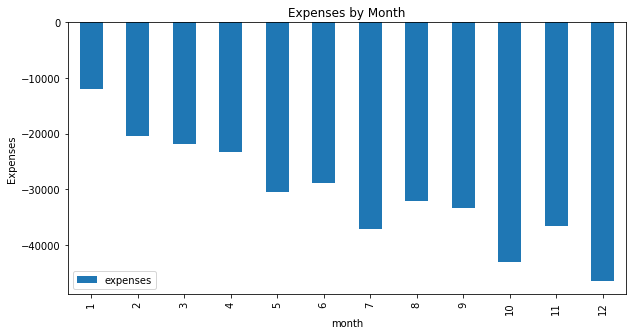

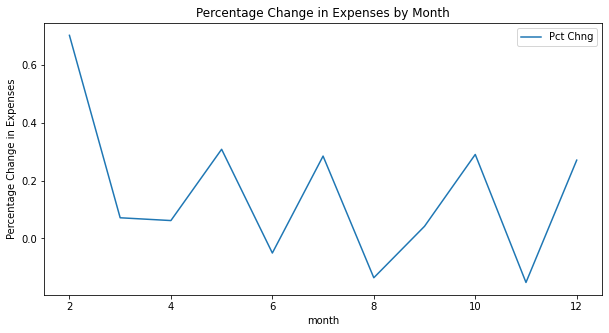

In [25]:
# plot expenses
expenses.plot(x='month', y='expenses', kind='bar', figsize=(10,5), title='Expenses by Month')
plt.ylabel('Expenses')
plt.show()

# plot the change
expenses.plot(x='month', y='Pct Chng', kind='line', figsize=(10,5), title='Percentage Change in Expenses by Month')
plt.ylabel('Percentage Change in Expenses')
plt.show()

-----
- We can observe that as the months pass, the company expenses increase, especially after the 6th month of the year.
-----

### Changes in Revenue

In [26]:
revenue = monthly_totals_test[monthly_totals_test['categoria'].isin(['INVOICE COLLECTION','FUNDING DISTRIBUTION'])].groupby('month')['amount'].sum()
revenue  = revenue.reset_index()
revenue.rename(columns={'amount': 'revenue'}, inplace=True)
revenue['Pct Chng'] = revenue['revenue'].pct_change()

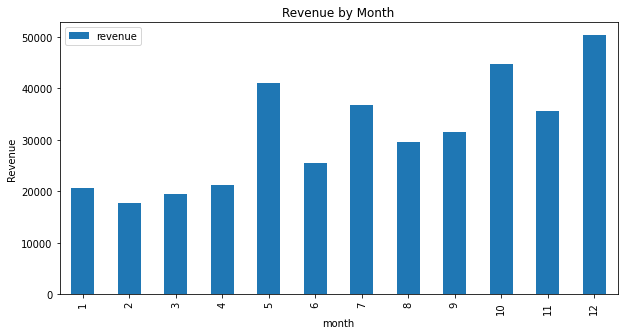

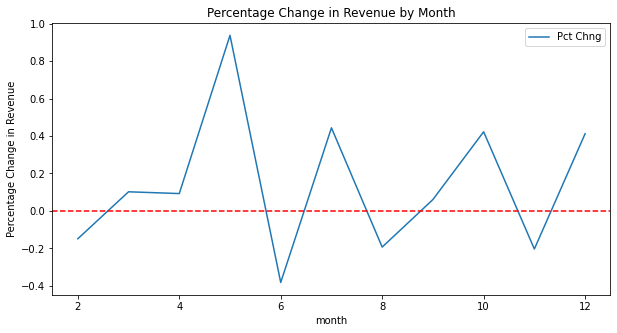

In [27]:
# plot expenses
revenue.plot(x='month', y='revenue', kind='bar', figsize=(10,5), title='Revenue by Month')
plt.ylabel('Revenue')
plt.show()

# plot the change
revenue.plot(x='month', y='Pct Chng', kind='line', figsize=(10,5), title='Percentage Change in Revenue by Month')
plt.axhline(0, color='red', linestyle='--')
plt.ylabel('Percentage Change in Revenue')
plt.show()

### Changes in Financing:

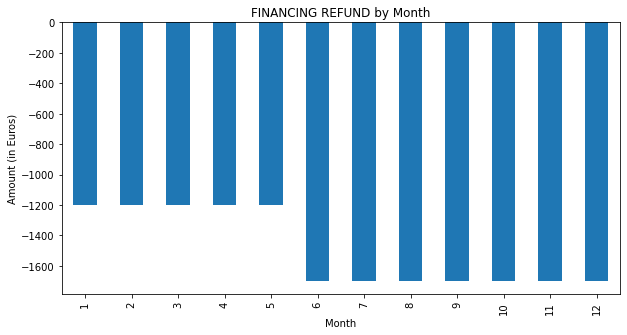

In [28]:
# Select only the FINANCING REFUND from monthly_totals_test dataframe
financing_refunds = monthly_totals_test[monthly_totals_test["categoria"] == "FINANCING REFUND"]
# Group the filtered data by "month" and sum the "amount" column
financing_refunds = financing_refunds.groupby("month")["amount"].sum()
# Plot the financing_refunds data in a bar chart
financing_refunds.plot(kind="bar",figsize=(10,5), title='FINANCING REFUND by Month')
plt.xlabel("Month")
plt.ylabel("Amount (in Euros)")
plt.show()

------------------
- In the last filed financial statement of the company(2021), the company had <b>"debts due within the following year €139,241" </b>
    
- But in the below we can see that only <b>€-17,000</b> of it had been repaid according to the transactions we are given.
- Moreover, we can see that the profit for the year 2022 is <b> €7,525</b> 
- It seems that the coming Funding of <b> €10,000</b> has <b> €500</b> monthly payment. The Interest range of Invoice factoring or financing ranges between 10% and 70%, the monthly payment of 500 in 24 months would not be wrong to assume this case.
-------------------

In [29]:
print('Paid Refunds:', int(financing_refunds.sum()))
print("2022 Profit :", int(monthly_totals_test['amount'].sum()))

Paid Refunds: -17900
2022 Profit : 7525


### Changes in Receivables and Supplier Payments

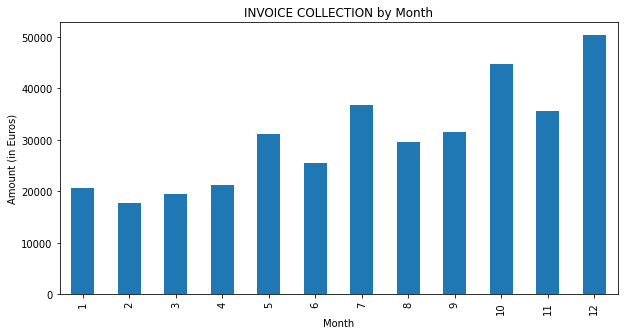

In [30]:
# Select only the FINANCING REFUND from monthly_totals_test dataframe
receivables = monthly_totals_test[monthly_totals_test["categoria"] == "INVOICE COLLECTION"]
# Group the filtered data by "month" and sum the "amount" column
receivables = receivables.groupby("month")["amount"].sum()
# Plot the financing_refunds data in a bar chart
receivables.plot(kind="bar",figsize=(10,5), title='INVOICE COLLECTION by Month')
plt.xlabel("Month")
plt.ylabel("Amount (in Euros)")
plt.show()

----
- We clearly see that invoice collection has a steady upside trend throughout the year.
- We also see that this increase in invoice collection has a correlation with SUPPLIER PAYMENT. (Chart is down below)
----

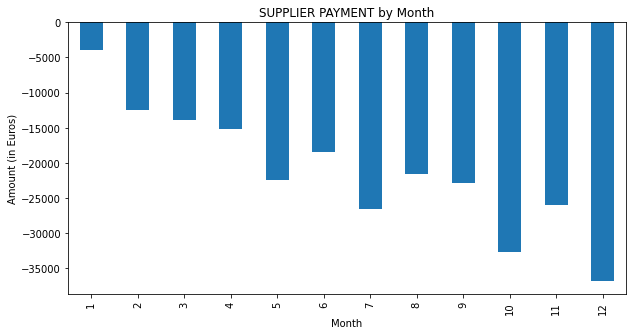

In [31]:
# Select only the FINANCING REFUND from monthly_totals_test dataframe
supplier_expenses = monthly_totals_test[monthly_totals_test["categoria"] == "SUPPLIER PAYMENT"]
# Group the filtered data by "month" and sum the "amount" column
supplier_expenses = supplier_expenses.groupby("month")["amount"].sum()
# Plot the financing_refunds data in a bar chart
supplier_expenses.plot(kind="bar",figsize=(10,5), title='SUPPLIER PAYMENT by Month')
plt.xlabel("Month")
plt.ylabel("Amount (in Euros)")
plt.show()

### Profit Margins

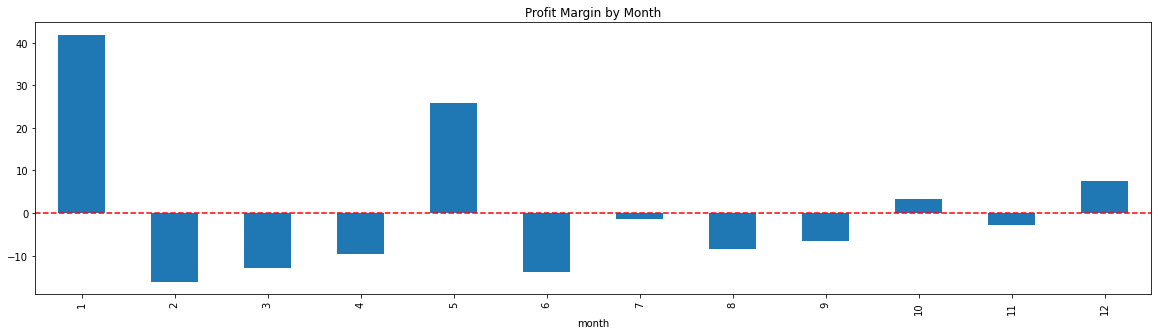

In [32]:
#Calculate total revenue and expenses for each month
revenue = monthly_totals[monthly_totals > 0].groupby(level=0).sum()
expenses = abs(monthly_totals[monthly_totals < 0].groupby(level=0).sum())
profit = revenue - expenses
profit_margin = (profit / revenue) * 100
profit_margin.plot(kind="bar",figsize=(20,5), title='Profit Margin by Month')
plt.axhline(0, color='red', linestyle='--')

-----
Based on these figures:

- Company experienced a profitable month in January (41.932251) but experienced negative margins in the next 5 months (February to June). The company then experienced a profitable month in May (25.865811) and slightly profitable or breakeven months in July and October (7.421775). The remaining months showed negative margins.

- This information suggests that the company might to review its operations and find ways to improve profitability, especially during the months where negative margins are reported.

- Although, Salaries haven't been given to the workers starting from the month of JULY, company is still struggling to make profits.
-----

In [33]:
income = monthly_totals_test[monthly_totals_test['categoria'].isin(['INVOICE COLLECTION'])].groupby('month')['amount'].sum()
debt = monthly_totals_test[monthly_totals_test['categoria'].isin(['FINANCING REFUND'])].groupby('month')['amount'].sum()

In [34]:
income[0:12].sum()

363533.46

In [35]:
InterestCoverageRatio_1 = income[0:3].sum() / abs(debt[0:3].sum())
InterestCoverageRatio_2 = income[3:6].sum() / abs(debt[3:6].sum())
InterestCoverageRatio_3 = income[6:9].sum() / abs(debt[6:9].sum())
InterestCoverageRatio_4 = income[9:13].sum() / abs(debt[9:12].sum())
# 10,000 EUROS that had been received in 2022, and 139,241 Euros to be paid in 2022, and 2000 of interest on the funding
DebtToIncomeRatio = income[0:12].sum() / (139241 + 10000 + 2000) 

In [61]:
print("-----------------------------------------------------------------")
print("In interest Coverage Ratio, we only used the FINANCE REFUND as out payment, therefore this by itself shouldn't be used to make a decision.")
print("-----------------------------------------------------------------")
print("The interest coverage ratio is a debt and profitability ratio used to determine how easily a company can pay interest on its outstanding debt.")
print("-----------------------------------------------------------------")
print("An interest coverage ratio of 1.5 is generally considered a minimum acceptable ratio for a company and the tipping point below which lenders will likely refuse to lend the company more money, as the company’s risk for default may be perceived as too high.")
print("-----------------------------------------------------------------")
print("Interest Coverage Ratio First Quarter:",InterestCoverageRatio_1 )
print("Interest Coverage Ratio Second Quarter:",InterestCoverageRatio_2 )
print("Interest Coverage Ratio Third Quarter:",InterestCoverageRatio_3 )
print("Interest Coverage Ratio Fourth Quarter:",InterestCoverageRatio_4 )
print("-----------------------------------------------------------------")
print("debt-to-income ratio (DTI) compares how much company owes each month to how much it earns.")
print("-----------------------------------------------------------------")
print("Debt To Income Ratio:", DebtToIncomeRatio , " - This DTI is super high")
print("-----------------------------------------------------------------")


-----------------------------------------------------------------
In interest Coverage Ratio, we only used the FINANCE REFUND as out payment, therefore this by itself shouldn't be used to make a decision.
-----------------------------------------------------------------
The interest coverage ratio is a debt and profitability ratio used to determine how easily a company can pay interest on its outstanding debt.
-----------------------------------------------------------------
An interest coverage ratio of 1.5 is generally considered a minimum acceptable ratio for a company and the tipping point below which lenders will likely refuse to lend the company more money, as the company’s risk for default may be perceived as too high.
-----------------------------------------------------------------
Interest Coverage Ratio First Quarter: 16.018525
Interest Coverage Ratio Second Quarter: 18.943097560975612
Interest Coverage Ratio Third Quarter: 19.150333333333336
Interest Coverage Ratio Fourth Q

-----
<p> Below is taken from investopedia.com</p>

- As a general guideline, 43% is the highest DTI ratio a borrower can have and still get qualified. Ideally, lenders prefer a debt-to-income ratio lower than 36%, with no more than 28% of that debt.

- The maximum DTI ratio varies from lender to lender.

-----

In [72]:
# Total Liabilities that are present in the filed financial statement of 202

# Long term, but since this is from 2021, the metric matters for us in 2023.
liabilities = 225168 
# Check what is the monthly expenses in 2022.
monthly_expenses = expenses.sum()
# Supplier Expenses
supplier_expenses_int = int(abs(supplier_expenses.sum()))

print("------------------------------------------")
# Calculation
# If we assume that total liabilities of the company also includes the supplier payments of each month in 2022.
max_monthly_payment = int(7000 / 12)
max_grant = int(income[0:12].sum() - liabilities)
remaining_amount_after_supplier = income[0:12].sum()- supplier_expenses_int

print("Max Monthly Payment that a company can pay: ",max_monthly_payment)
print("------------------------------------------")
print("Hypothetical max grant:",max_grant, "- (This is just the difference between liabilities and the income. Supplier payments are too high, therfore this amount of grant can't be lended.)")
print("------------------------------------------")
print("Total Liabilities of the company from the filed 2021 statament :", 225168)
print("------------------------------------------")
print("Supplier expenses in 2022:", supplier_expenses_int)
print("------------------------------------------")
print("Income of the year 2022 minus the supplier expenses :",int(remaining_amount_after_supplier))
print("------------------------------------------")





------------------------------------------
Max Monthly Payment that a company can pay:  583
------------------------------------------
Hypothetical max grant: 138365 - (This is just the difference between liabilities and the income. Supplier payments are too high, therfore this amount of grant can't be lended.)
------------------------------------------
Total Liabilities of the company from the filed 2021 statament : 225168
------------------------------------------
Supplier expenses in 2022: 253042
------------------------------------------
Income of the year 2022 minus the supplier expenses : 110491
------------------------------------------


### Conclusion

-----

<h4>Based on the findings here is a summary.</h4>

- In 2021, The ABC company has a negative shareholders equity profit loss of <b>€94,264</b>, indicating that it has not generated a profit for the year 2021. <br><br>

- Company may have struggled from COVID-19 Outbreak in 2020, which they still see the effects on 2021.
<br><br>

- Its solvency metrics, such as the <b>Debt to Asset Ratio</b> of 0.00618 and <b>Debt to Equity Ratio</b> of <b>1.62</b>, suggest that the company has a small portion of its assets financed by debt but a higher debt burden compared to its equity. Its liquidity metrics, such as the <b>Current Ratio</b> of <b>1.06</b> and <b>Quick Ratio</b> of <b>0.42</b>, indicate that the company has sufficient current assets to cover its short-term obligations, but may face difficulties in meeting its immediate cash obligations in the event of a crisis.<br><br>

- In 2022, The company seems to have a steady increase in net cash flow after the 6th month of the year 2022, with an overall net profit of <b>€7,525</b>. Invoice collection has a steady upward trend throughout the year and the company's expenses have increased as the months pass, especially after the 6th month. The company had debts due within the following year(2021) of <b>€139,241</b>, but only <b>€17,000</b> of it has been repaid according to the transactions given for (2022).<br><br>

- In 2022, The sudden decrease in the net cash flow in the 2nd and 6th months, the non-payment of salaries after July, and the variation in supplier payments, utilities expenses, and invoice collection, suggest that the company may be facing financial difficulties. This, along with the negative return on equity, and the moderate amount of debt financing relative to equity, raises concerns for the lender in granting the short term funding request.<br><br>

- It seems that the coming Funding of <b> €10,000</b> has <b> €500</b> monthly payment. The Interest range of Invoice factoring or financing ranges between 10% and 70%, the monthly payment of <b>€500</b> in 24 months would not be wrong to assume this case.<br><br>

-  We can also say that the company has generated more income than it's total liabilities from the previous year(2022), but, at the same time, company spends good amount of money on supplier. As the good increases, the supplier payments also goes up.<br><br>

- According to all the metrics we have calculated, It would be risky to accept funding request from the ABC company given that they the company has High DBTI ratio, negative cashflow in 8 months out of 12, given also that the company has not been generated profit in 2021, and only 7,000 euro profit in the 2022.<br><br> 

- Although the metrics suggest that company could struggle for short term liquidity events, according to the cashflow, the company still can survive with a maximum monthly payment around <b>€500</b>. We need to take into account that in 2020 there was a covid outbreak, in 2021, they still had it's effects, and in 2022 we see that company made profit even if it's not too high. As the macro economical condition and consumer behaviours change, in this new coming year, company has a chance of making more profit and see the continuation of it's up-trend. (2021:-94,000, 2022: +7,000)
    
    
- So when we think about all the factors, with an interest rate of yearly 20% we can lend 5,000 Euros for 12 months, in return, we get 1,000 Euros in profit. 

-----